In [2]:
"""
このノートブックを理解すると、matplotlibの基礎概念が身につき、自力できれいなグラフをアレンジできるようになる。
参考
https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9
http://bicycle1885.hatenablog.com/entry/2014/02/14/023734
"""

'\nこのノートブックを理解すると、matplotlibの基礎概念が身につき、自力できれいなグラフをアレンジできるようになる。\n参考\n'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
"""
描画の方法１：全てplt.～で設定する方法。〇直感的　〇パパっと出せる　×細かい設定が難しい ×単純すぎて逆に混乱する

subplot(l,w,n):複数の分割されたグラフの指定。縦l×横wに分割されたグラフのn番目の部屋を指定する。
plot:subplotに対するデータのプロットの指定。
title:タイトルの指定
legend:凡例の指定
show():可視化の設定
ほか
"""

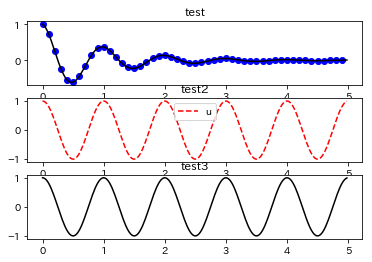

In [16]:
# https://matplotlib.org/tutorials/introductory/pyplot.html より
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.subplot(311) #3×1のうち1番目の部屋の指定

#以下、subplot(311)について指定
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.title("test")


#subplot(312)を指定すると、設定対象が切り替わる
plt.subplot(312)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.title("test2")
plt.legend("upper")

plt.subplot(313)
plt.plot(t2, np.cos(2*np.pi*t2), 'k')
plt.title("test3")

plt.show()

In [17]:
"""
描画の方法２(推奨)：オブジェクト指向による指定方法。　〇細かい設定がしやすい　△オブジェクト指向を含め理解が難しい
階層構造については以下の図を参照のこと
https://camo.qiitausercontent.com/876445a91e7fa6887ee57311efd273fe2cc680dd/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3232323834392f61303639393039382d663266312d373538352d366534362d3931623430303034383931322e706e67

containers; グラフの「入れ物」。グラフの数や軸を設定する
 Figure; グラフ全体。複数のAxesを持てる
 Axes; Figureに含まれるグラフ。上述のsubplotとほぼ同義　
 　　　※Axisは１ペアしか持てない。
    　【重要】ax.plot()等のメソッドにより、どんどんprimitivesを追加する
 Axis; Axesに含まれる軸。XとYの2本あり
 
primitives; グラフの「中身」。線など。
 Line2D; いわゆる線。ax.plot()の中身で指定可能
 legend; 凡例。ax.legend()で指定可能
 set_title;タイトル
 ほか
"""

'\n描画の方法２(推奨)：オブジェクト指向による指定方法。\u3000〇細かい設定がしやすい\u3000△オブジェクト指向を含め理解が難しい\n階層構造については以下の図を参照のこと\nhttps://camo.qiitausercontent.com/876445a91e7fa6887ee57311efd273fe2cc680dd/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3232323834392f61303639393039382d663266312d373538352d366534362d3931623430303034383931322e706e67\n\ncontainers; グラフの「入れ物」。グラフの数や軸を設定する\n Figure; グラフ全体。複数のAxesを持てる\n Axes; Figureに含まれるグラフ。上述のsubplotとほぼ同義\u3000\n \u3000\u3000\u3000※Axisは１ペアしか持てない。\n    \u3000【重要】ax.plot()等のメソッドにより、どんどんprimitivesを追加する\n Axis; Axesに含まれる軸。XとYの2本あり\n \nprimitives; グラフの「中身」。線など。\n Line2D; いわゆる線。ax.plot()の中身で指定可能\n legend; 凡例。ax.legend()で指定可能\n set_title;タイトル\n ほか\n'

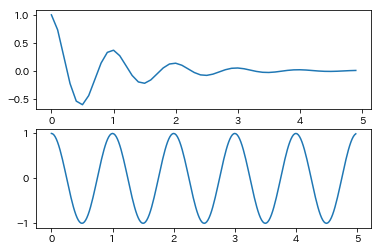

In [18]:
fig = plt.figure() # Figureオブジェクトを作成

ax = fig.add_subplot(2,1,1) # figに属するAxesオブジェクトを作成。2×1の1番目
ax.plot(t1, f(t1))

ax2 = fig.add_subplot(2,1,2) # figに属するAxesオブジェクトを作成　2×1の2番目
ax2.plot(t2, np.cos(2*np.pi*t2))

ax.lines before plot:
 []
ax.lines after 1st plot:
ax.lines after 2nd plot:
 [<matplotlib.lines.Line2D object at 0x000001DE66A4EF60>, <matplotlib.lines.Line2D object at 0x000001DE66A5B668>]
line1: Line2D(1st plot)
line2: Line2D(2nd plot)


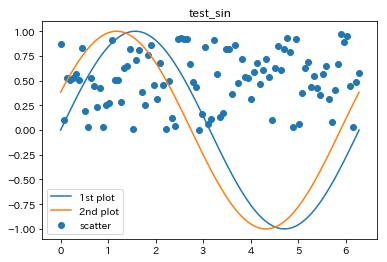

In [19]:
x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure() # Figureインスタンスを作成
ax = fig.add_subplot(1,1,1) # Axesインスタンスを作成
print('ax.lines before plot:\n', ax.lines) # Axes.linesは空リスト

line1, = ax.plot(x, np.sin(x), label='1st plot') # axのplotメソッドにより、Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 1st plot:\n', ax.lines)

line2, = ax.plot(x, np.sin(x+np.pi/8), label='2nd plot') # Axes.linesにLine2Dを追加+その他の設定
scat = ax.scatter(x, np.random.rand(len(x)), label='scatter')
print('ax.lines after 2nd plot:\n', ax.lines)

ax.legend(loc="lower left") #labelで指定した要素を呼び出すと凡例になる
ax.set_title("test_sin")
print('line1:', line1)
print('line2:', line2)

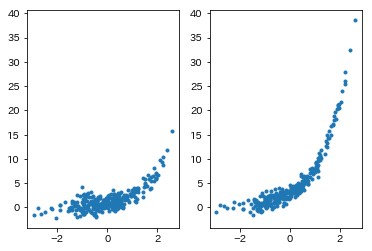

In [20]:
"""
tips; 2つのグラフを比較しやすくする方法
"""
n = 300
x = np.random.randn(n)
y1 = np.exp(x) + np.random.randn(n)
y2 = np.exp(x) * 3 + np.random.randn(n)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1) #引数としてshareyを指定

ax1.plot(x, y1, ".")
ax2.plot(x, y2, ".")
#２つのY軸がそろった

In [ ]:
"""
tips; seabornというモジュールを用いると、matplotlibが拡張され、グラフのスタイルの選択肢が広がる
https://note.nkmk.me/python-matplotlib-seaborn-basic/
"""

In [21]:
"""
tips;日本語の表示方法：フォントの変更が必要
http://paper.hatenadiary.jp/entry/2016/11/06/222223
https://qiita.com/yniji/items/3fac25c2ffa316990d0c
"""

import matplotlib.font_manager as fm
# フォント一覧
fonts = fm.findSystemFonts() 
# フォントのパスと名前を取得、とりあえず10個表示
print([[str(font[1]), fm.FontProperties(fname=font).get_name()] for font in fonts[:10]])

[[':', 'Cambria'], [':', 'Lucida Sans Typewriter'], [':', 'Segoe UI'], [':', 'OCRB'], [':', 'Calibri'], [':', 'Symbol'], [':', 'Garamond'], [':', 'MV Boli'], [':', 'Segoe Print'], [':', 'Myanmar Text']]


Text(0.5,1,'日本語テスト')

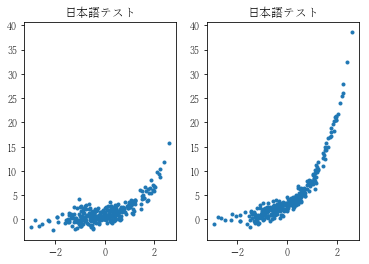

In [24]:
"""
上の中から日本語に対応しているフォントを選び、スクリプトの冒頭で宣言する
"""
import matplotlib as mpl
font = {"family":"Yu Mincho"}
mpl.rc('font', **font)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1) 
ax1.plot(x, y1, ".")
ax2.plot(x, y2, ".")
ax1.set_title("日本語テスト")
ax2.set_title("日本語テスト")

Text(0.5,1,'日本語テスト')

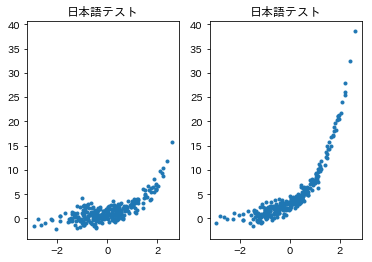

In [25]:
"""
日本語フォントはIPAゴシックなども見やすい。windowsの場合ダウンロードする必要あり
https://qiita.com/yniji/items/3fac25c2ffa316990d0c
ダウンロード完了後、先ほどと同様に以下を実施
"""
import matplotlib as mpl

mpl.font_manager._rebuild() #キャッシュの再構築が必要

font = {"family":"IPAexGothic"}
mpl.rc('font', **font)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1) 
ax1.plot(x, y1, ".")
ax2.plot(x, y2, ".")
ax1.set_title("日本語テスト")
ax2.set_title("日本語テスト")

Text(0.5,1,'日本語テスト')

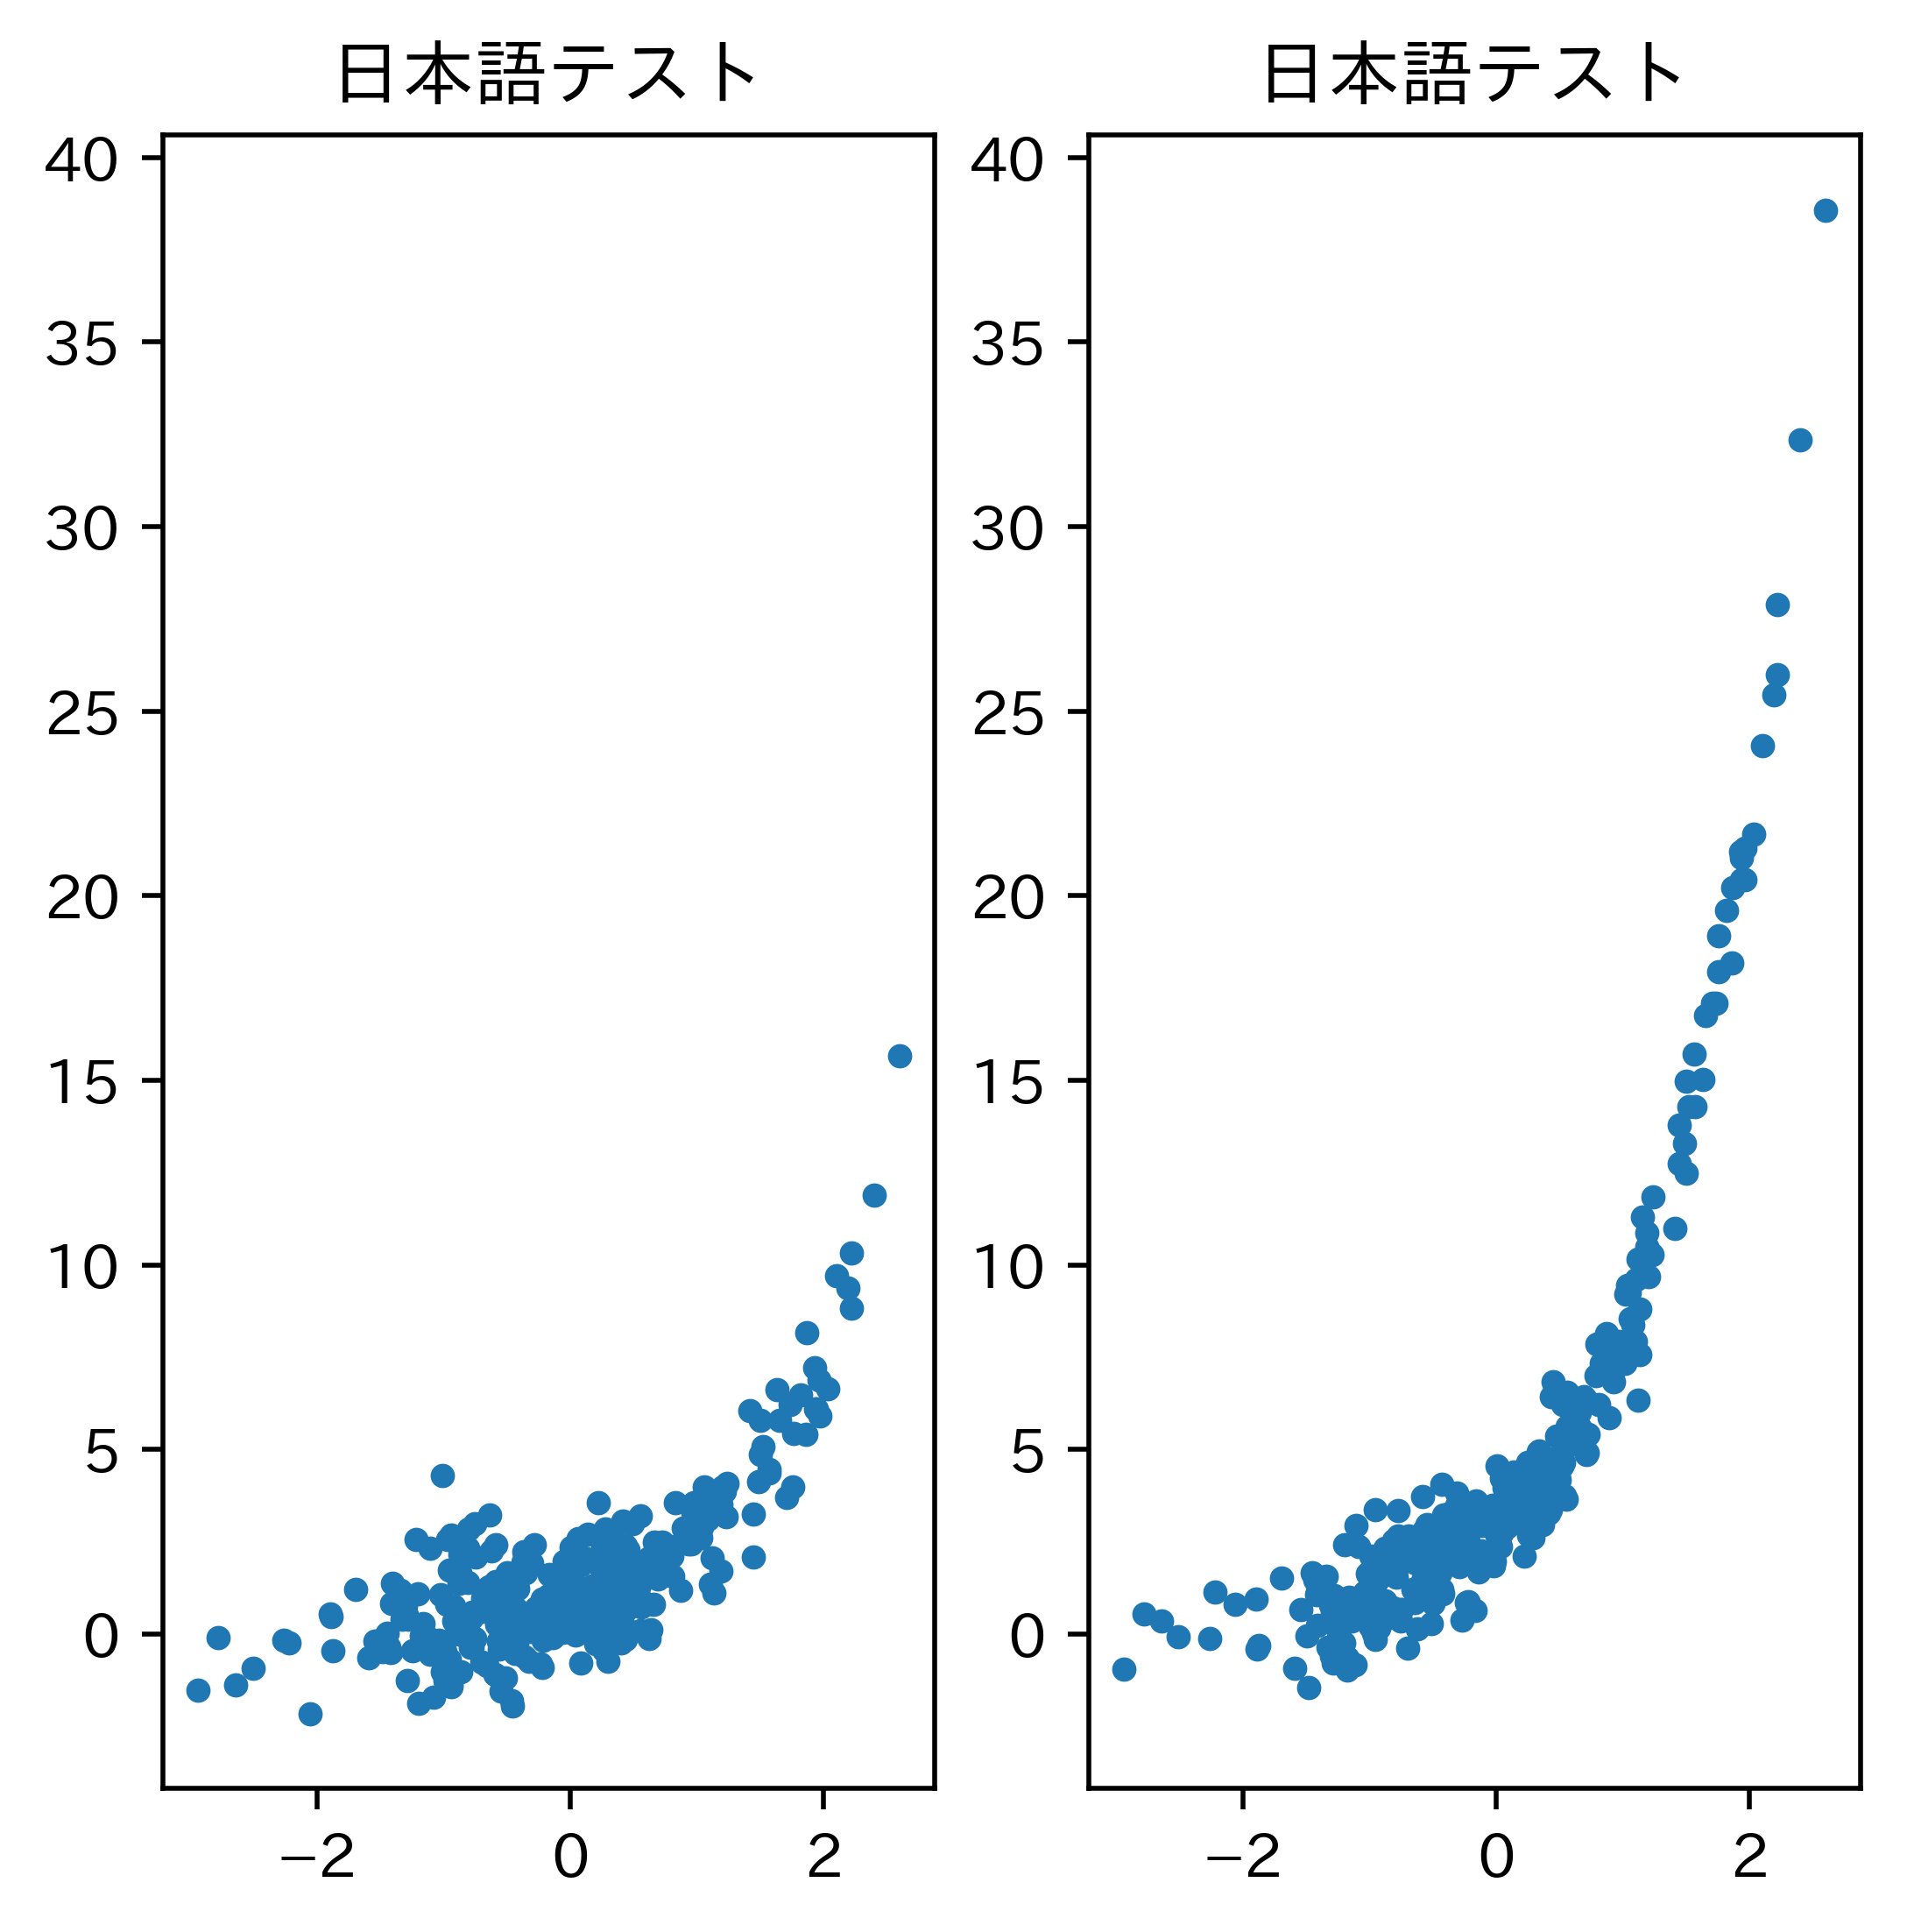

In [27]:
"""
tips; 字のぼやけの緩和やサイズは以下のように調整する
https://qiita.com/7of9/items/5851e542f4041ec33f2b
figsize,dpi: 順にfigureのサイズ,解像度。ともにfigureインスタンスを立てるときに指定する引数。
を入れられる
"""
fig = plt.figure(figsize=(5,5),dpi=500)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1) 
ax1.plot(x, y1, ".")
ax2.plot(x, y2, ".")

ax1.set_title("日本語テスト")
ax2.set_title("日本語テスト")